In [10]:
import pandas as pd 
import requests
import numpy as np 
from bs4 import BeautifulSoup

url = 'http://www.st-petersburg.vybory.izbirkom.ru/region/region/st-petersburg?action=show&root=1&tvd=27820001217417&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217417&type=222'

req = requests.get(url) #присвоить результат запроса этой страницы

soup = BeautifulSoup(req.text, "lxml")

def urlar(soup):
#Возвращает список,состоящий из ссылок
	find_tiks = soup.find_all('table')[2].find_all('tr')[3]\
					.find_all('table')[3].find_all('td', width="90%")[0]\
					.find_all('tr')[0].find_all('td')
	links = []
	for i in range(len(find_tiks)-1):
		find_link = str(find_tiks[i].find_all('a')[0])
		instart_link = find_link.find("http")
		inend_link = find_link[instart_link:].find(" ") + instart_link
		link_tik = find_link[instart_link:inend_link-1]
		link_tik = link_tik.replace('amp;', '')
		links.append(link_tik)
	return links

def tikdf(urlar):
    #Возвращает Датафрейм с информацией о каждом ТИКе
	dftik = pd.DataFrame()
	for i in range(len(urlar)):
		df = pd.read_html(urlar[i], encoding='CP1251')
		df6 = df[6].drop(12)
		header = df6[1]
		header.iloc[:1] = "УИК"
		df = df[7].drop(12).T
		df.columns = header
		dftik = dftik.append(df, ignore_index = True)
	return dftik

urlar = urlar(soup)
df = tikdf(urlar)
df.head()

1,УИК,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна
0,УИК №1,1803,1200,587,11,602,11,587,23,575,0,0,110 18.39%,345 57.69%,120 20.07%
1,УИК №2,1466,1100,433,14,653,14,430,19,425,0,0,53 11.94%,326 73.42%,46 10.36%
2,УИК №3,2092,1600,576,22,1002,22,576,15,583,0,0,155 25.92%,332 55.52%,96 16.05%
3,УИК №4,1056,1000,318,4,678,4,318,13,309,0,0,67 20.81%,171 53.11%,71 22.05%
4,УИК №5,1827,1400,495,8,897,8,493,16,485,0,0,137 27.35%,266 53.09%,82 16.37%


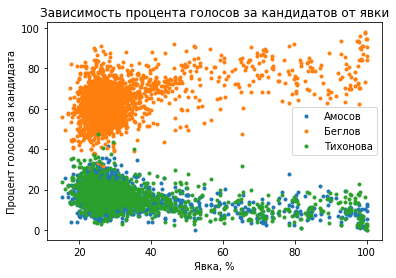

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

def graf(df, who):
    if who == "Амосов":
        c = 12
    elif who == "Беглов":
        c = 13
    elif who == "Тихонова":
        c = 14
    else:
        return print("Такого кандидата нет")
    y = []
    for i in range(len(df)):
        a = df.iloc[:,c][i].find("%")
        b = df.iloc[:,c][i].find(" ")
        y.append(float(df.iloc[:,c][i][b + 1:a]))
    x = []
    for i in range(len(df)):
        a = int(df.iloc[:,9][i])
        b = int(df.iloc[:,1][i])
        x.append(a / b * 100)
    plt.title(r'Зависимость процента голосов за кандидатов от явки')
    plt.ylabel('Процент голосов за кандидата')
    plt.xlabel('Явка, %')
    plt.plot(x, y, '.', label = who)
    plt.legend(loc='best')

graf(df, "Амосов")
graf(df, "Беглов")
graf(df, "Тихонова")

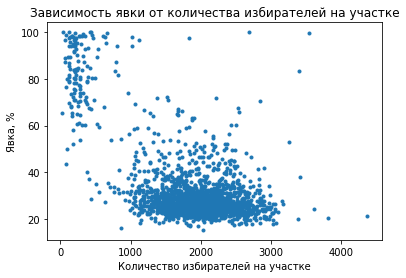

In [4]:
def avka_izber(df):
    x = []
    for i in range(len(df)):
        x.append(int(df.iloc[:,1][i]))
    y = []
    for i in range(len(df)):
        a = int(df.iloc[:,9][i])
        b = int(df.iloc[:,1][i])
        y.append(a / b * 100)
    plt.xlabel('Количество избирателей на участке')
    plt.ylabel('Явка, %')
    plt.title(r'Зависимость явки от количества избирателей на участке')
    plt.plot(x, y, '.');
avka_izber(df)